In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x213d29a2a20>,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
Measurement.metadata.tables['measurement'].columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [12]:
Station.metadata.tables['station'].columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
# Find the last data point
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = np.ravel(last_date)
print(f'The most recent data point for date: {last_date}')

last_12_months = session.query(Measurement.date).\
    filter(Measurement.date >= last_date).\
    order_by(Measurement.date.desc()).all()
# print(last_12_months)

recent_year = []
recent_mon = []
recent_day = []
for date in last_date:
    recent_year.append(date[:4])
    recent_mon.append(date[5:7])
    recent_day.append(date[8:10])  
# print(recent_year) 
# print(recent_mon) 
# print(recent_day) 

# Date 1 year ago from the last data point
year_ago = dt.date(int(recent_year[0]), int(recent_mon[0]), int(recent_day[0])) - dt.timedelta(days=365)
print(f'The date one year ago from the last data point: {year_ago}')

The most recent data point for date: ['2017-08-23']
The date one year ago from the last data point: 2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
date_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp, columns=['Date', 'Precipitation'])
date_prcp_df.set_index('Date', inplace=True)
date_prcp_df = date_prcp_df.fillna(0)

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values('Date', ascending=True)
date_prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


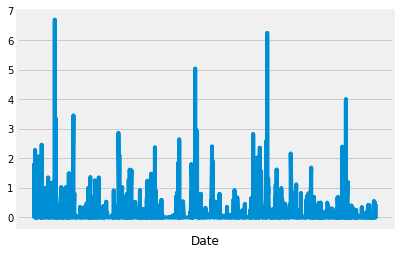

In [16]:
# Create Figure and Axes instances
fig,ax = plt.subplots(1)

# Make your plot, set your axes labels
ax.plot(date_prcp_df.index, date_prcp_df['Precipitation'])
ax.set_xlabel('Date')

# Turn off tick labels
ax.set_xticklabels([])
ax.grid(axis='x')

plt.show()

![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,Precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(low_temp)
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(high_temp)
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_tobs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station)\
    .order_by(func.count(Measurement.tobs).desc()).first()
print(highest_tobs)

highest_tobs_ltm = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date.desc()).all()
# print(highest_tobs_ltm)

('USC00519281', 2772)


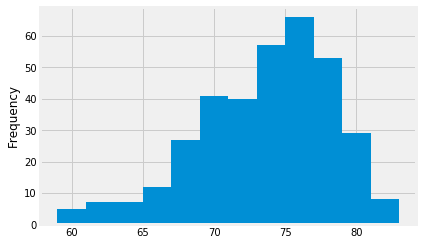

In [22]:
# Unpack and list
tobs = list(np.ravel(highest_tobs_ltm))
# print(tobs)


plt.hist(tobs, bins=12)
plt.ylabel('Frequency')
plt.show()

![precipitation](Images/station-histogram.png)

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps = calc_temps('2017-08-12', '2017-08-17')
print(temps)

[(70.0, 78.23076923076923, 84.0)]


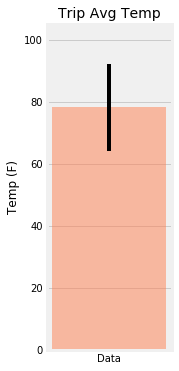

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
results = list(np.ravel(temps))
# print(results)

tmin = results[0]
tavg = results[1]
tmax = results[2]
# print(tavg)
ptp = tmax-tmin
# print(ptp)


# Plot Avg temp
x = ['Data']
plt.figure(figsize=(2,6))
plt.bar(x, tavg, yerr=ptp, color='coral', alpha=0.50)
plt.ylim(0, 105)
plt.ylabel('Temp (F)', fontsize=12)
plt.title('Trip Avg Temp', fontsize=14)
plt.grid(axis='x')
plt.show()

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(Measurement.station,\
              func.sum(Measurement.prcp),\
              Station.name,\
              Station.latitude,\
              Station.longitude,\
              Station.elevation).\
              filter(Station.station == Measurement.station).\
              group_by(Measurement.station).\
              order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00516128',
  1068.0899999999956,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  588.6399999999976,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117',
  382.61999999999847,
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6),
 ('USC00519523',
  295.67999999999944,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  234.49000000000026,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397',
  131.62000000000063,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00511918',
  92.68000000000006,
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 ('USC00518838',
  70.87000000000005,
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6),
 ('USC00517948',
  43.44000000000002,
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9)]

In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# previous year trip dates : 2017-08-12, 2017-08-17
session.query(Measurement.station,\
              func.sum(Measurement.prcp),\
              Station.name,\
              Station.latitude,\
              Station.longitude,\
              Station.elevation).\
              filter(Station.station == Measurement.station).\
              filter(Measurement.date >= '2017-08-12', Measurement.date <='2017-08-17').\
              group_by(Measurement.station).\
              order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00516128',
  1.33,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  0.45,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00519523',
  0.26,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519397', 0.02, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00514830',
  0.01,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0)]

## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
list(np.ravel(daily_normals("08-12")))

[67.0, 76.52727272727273, 83.0]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start = '2017-08-12'
end = '2017-08-17'

# Use the start and end date to create a range of dates
dates = session.query(Measurement.date).filter(Measurement.date >= start).filter(Measurement.date <= end).\
    group_by(Measurement.date).all()
dates = list(np.ravel(dates))
print(dates)
# Stip off the year and save a list of %m-%d strings

dates_list = []
for date in dates:
    dates_list.append(date[5:])
print(dates_list)

# # Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for each in dates_list:
    normals.append(list(np.ravel(daily_normals(each))))   
normals
 
    

['2017-08-12', '2017-08-13', '2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17']
['08-12', '08-13', '08-14', '08-15', '08-16', '08-17']


[[67.0, 76.52727272727273, 83.0],
 [71.0, 76.98245614035088, 84.0],
 [71.0, 76.77777777777777, 82.0],
 [69.0, 76.47169811320755, 83.0],
 [69.0, 76.08, 83.0],
 [69.0, 76.125, 83.0]]

In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals)
normals_df

,0,1,2
0,67.0,76.527273,83.0
1,71.0,76.982456,84.0
2,71.0,76.777778,82.0
3,69.0,76.471698,83.0
4,69.0,76.080000,83.0
5,69.0,76.125000,83.0


In [32]:
dates_df = pd.DataFrame(dates_list)
dates_df

,0
0,08-12
1,08-13
2,08-14
3,08-15
4,08-16
5,08-17


In [33]:
daily_normals_df = pd.merge(dates_df, normals_df, right_index=True, left_index=True)
# daily_normals_df

daily_normals_df.rename(columns={'0_x':'Date','0_y':'TMIN',1:'TAVG', 2:'TMAX'}, inplace=True)
daily_normals_df.set_index('Date',inplace=True)
daily_normals_df

,TMIN,TAVG,TMAX
Date,,,
08-12,67.0,76.527273,83.0
08-13,71.0,76.982456,84.0
08-14,71.0,76.777778,82.0
08-15,69.0,76.471698,83.0
08-16,69.0,76.080000,83.0
08-17,69.0,76.125000,83.0


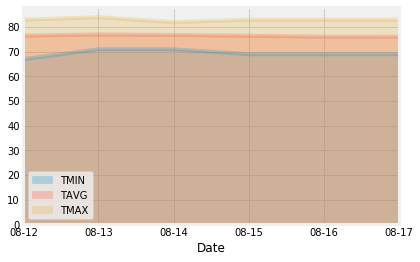

In [34]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot.area(stacked=False, alpha=0.25)